# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Autoencoders for Anomaly Detection

**Steps**:
1. Data Set: Download a dataset of electricity consumption data.
2. Build an Autoencoder: Construct a simple autoencoder using a neural network for the
normal consumption data.
3. Identify Anomalies: Use the trained model to reconstruct the data and identify anomalies based on reconstruction error.
4. Visualize: Plot both the actual and reconstructed data to highlight anomalies.

2025-05-25 09:00:40.832572: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-25 09:00:41.133671: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-25 09:00:41.249427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748163641.438004   25856 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748163641.531050   25856 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748163642.084700   25856 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


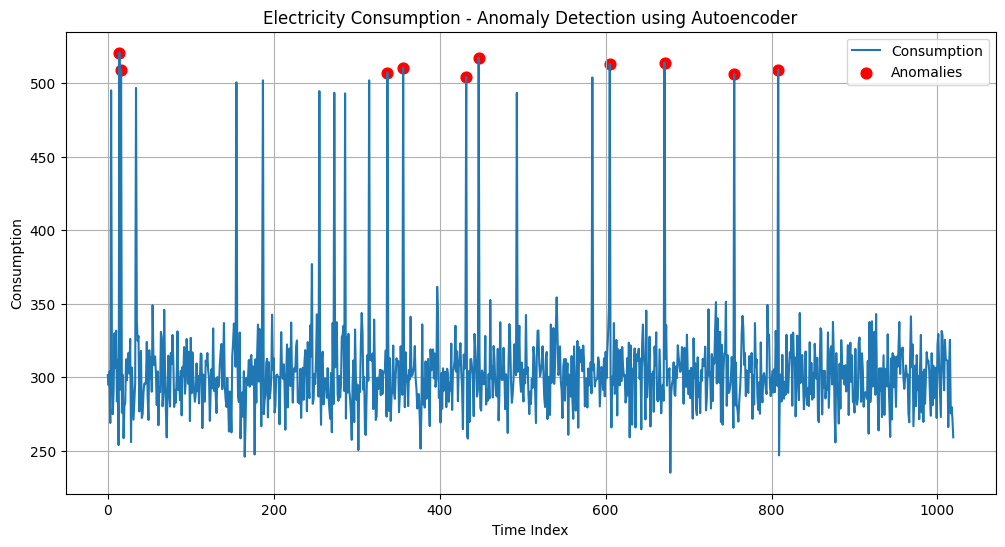

Total records: 1020
Anomalies detected: 10
Anomaly indices: [ 14  16 337 356 432 447 605 671 755 808]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Simulate Electricity Consumption Dataset
np.random.seed(42)
normal_data = np.random.normal(loc=300, scale=20, size=(1000, 1))  # Normal daily usage
anomalies = np.random.normal(loc=500, scale=10, size=(20, 1))      # Anomalous spikes
data = np.vstack([normal_data, anomalies])
np.random.shuffle(data)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Build a Simple Autoencoder
input_dim = data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train autoencoder (only on normal data)
autoencoder.fit(data_scaled[:1000], data_scaled[:1000],
                epochs=30,
                batch_size=32,
                shuffle=True,
                verbose=0)

# Step 3: Use the model to identify anomalies
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)

# Use threshold based on training data (e.g., 99th percentile of MSE)
threshold = np.percentile(mse[:1000], 99)
anomalies = mse > threshold

# Step 4: Visualize results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Consumption')
plt.scatter(np.where(anomalies)[0], data[anomalies], color='red', label='Anomalies', s=60)
plt.title("Electricity Consumption - Anomaly Detection using Autoencoder")
plt.xlabel("Time Index")
plt.ylabel("Consumption")
plt.legend()
plt.grid(True)
plt.show()

# Print summary
print("Total records:", len(data))
print("Anomalies detected:", np.sum(anomalies))
print("Anomaly indices:", np.where(anomalies)[0])